In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

data = pd.read_csv("Data.csv")

In [3]:
data['Stroke(AIS,TIA,AHS)'] = 1
data.head()

,"Stroke(AIS,TIA,AHS)",Sex01,StrokeAge,gFGB,gF2,gF5,gF7VII,gF13,gITGA,gITGB,...,gADD1 1378 G>T,gAGT T704C,gAGT C521T,gAGTR1 A 1166C,gAGTR2 G1675A,gCYP11B2 C344T,gGNB3 825C>T,gNOS3 T786C,gNOS3 G894T,DisNeuro01
0,1,1,1.0,0,0,0,0.0,1.0,2.0,0.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,2.0,0
1,1,1,3.0,0,0,0,0.0,0.0,2.0,0.0,...,0.0,1.0,0.0,0.0,2.0,1.0,1.0,1.0,1.0,0
2,1,0,5.0,0,0,0,0.0,1.0,1.0,2.0,...,1.0,2.0,1.0,0.0,2.0,1.0,0.0,2.0,0.0,0
3,1,1,0.0,0,0,0,0.0,0.0,2.0,1.0,...,0.0,1.0,1.0,0.0,2.0,1.0,2.0,1.0,1.0,0
4,1,1,13.0,0,0,0,1.0,0.0,0.0,0.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0


In [4]:
X = data.ix[:, :-1]
Y = data.ix[:, -1]

X_dropped = data.dropna().ix[:, :-1]
Y_dropped = data.dropna().ix[:, -1]

попытаемся сделать еще выборку на данных, отбросив некоторые признаки

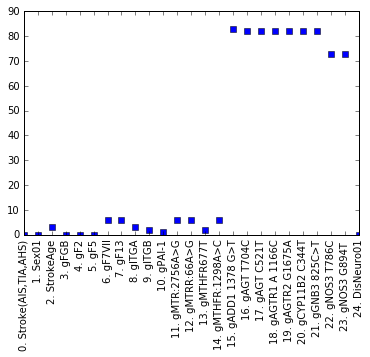

In [5]:
nulls = data.isnull().sum()
keys = nulls.keys()
values = nulls.values
words = [str(i)+". "+k.decode('utf-8').encode('ascii', 'ignore') for i, k in enumerate(nulls.keys())]

ind = np.arange(len(keys))
ax = plt.figure().add_subplot(111)
ax.set_xticks(ind)
ax.plot(values, 's')
xtickNames = ax.set_xticklabels(words)
plt.setp(xtickNames, rotation=90, fontsize=10)

plt.show()

Мы видим, что в 9 столбцах из 24 имеется большое число пропусков. Удалим столбцы, а затем удалим из полученного фрейма строки, включающие в себя null'ы (их будет порядка десяти):

In [6]:
a = pd.DataFrame(values, keys)
indexes = a.loc[:].where(a < 50).dropna().index

In [7]:
data_chopped = data[indexes].dropna()
X_chopped = data_chopped.ix[:, :-1]
Y_chopped = data_chopped.ix[:, -1]
data_chopped.shape

(143, 16)

In [8]:
from sklearn.model_selection import train_test_split


Xd_train, Xd_test, yd_train, yd_test = train_test_split( 
    X_dropped, Y_dropped, test_size = 0.2, random_state=1, stratify=Y_dropped)

Xc_train, Xc_test, yc_train, yc_test = train_test_split( 
    X_chopped, Y_chopped, test_size = 0.2, random_state=1, stratify=Y_chopped)

In [9]:
from sklearn import tree

dt = tree.DecisionTreeClassifier()
dt = dt.fit(Xd_train, yd_train)
res = dt.predict(Xd_test)

In [10]:
dt2 = tree.DecisionTreeClassifier()
dt2 = dt2.fit(Xc_train, yc_train)
res2 = dt2.predict(Xc_test)

In [16]:
from sklearn.metrics import classification_report
from sklearn.metrics import accuracy_score

In [12]:
dt = tree.DecisionTreeClassifier()
dt = dt.fit(Xd_train, yd_train)
res = dt.predict(Xd_test)

print classification_report(yd_test, res)
print accuracy_score(yd_test, res)

             precision    recall  f1-score   support

          0       0.40      0.25      0.31         8
          1       0.40      0.57      0.47         7

avg / total       0.40      0.40      0.38        15

0.4


In [13]:
print classification_report(yc_test, res2)
print accuracy_score(yc_test, res2)

             precision    recall  f1-score   support

          0       0.67      0.67      0.67        15
          1       0.64      0.64      0.64        14

avg / total       0.66      0.66      0.66        29

0.655172413793


Очевидно, результат на данных с меньшим числом признаков лучше, чем на данных со всеми признаками.
Попробуем в случайный лес.

In [35]:
from sklearn.ensemble import RandomForestClassifier

rf = RandomForestClassifier(random_state=1)
rf = rf.fit(Xd_train, yd_train)
res = rf.predict(Xd_test)

print classification_report(yd_test, res)
print accuracy_score(yd_test, res)

             precision    recall  f1-score   support

          0       0.50      0.75      0.60         8
          1       0.33      0.14      0.20         7

avg / total       0.42      0.47      0.41        15

0.466666666667


In [36]:
rf2 = RandomForestClassifier(random_state=1)
rf2 = rf2.fit(Xc_train, yc_train)
res2 = rf2.predict(Xc_test)

print classification_report(yc_test, res2)
print accuracy_score(yc_test, res2)

             precision    recall  f1-score   support

          0       0.64      0.47      0.54        15
          1       0.56      0.71      0.63        14

avg / total       0.60      0.59      0.58        29

0.586206896552


In [ ]:
from sklearn.model_selection import GridSearchCV
from time import time

n_features=15

start=time()

param_grid = {
    "n_estimators": [5, 10, 18, 20],
    "criterion": ["gini", "entropy"],
    "max_features": [1, 3, 10, "sqrt"],
    "max_depth": [1, 3, 5, 10],
    "min_samples_split": [2, 3, 10],
    "min_samples_leaf": [1, 3, 10],
    "bootstrap": [True, False],
             }
tuned_forest = GridSearchCV(RandomForestClassifier(), param_grid)
tuned_forest.fit(Xc_train, yc_train)

print "Taken time:", time()-start
print "Best params: ", tuned_forest.best_params_

In [31]:
from sklearn.model_selection import  StratifiedShuffleSplit, learning_curve
def learning_curve_model(X, Y, model, cv, train_sizes):
    """Функция строит кривую обучения"""
    plt.figure(figsize=(10, 10))
    plt.title("Learning curve")
    plt.xlabel("Training examples")
    plt.ylabel("Score")


    train_sizes, train_scores, test_scores = learning_curve(model, X, Y, cv=cv, n_jobs=4, train_sizes=train_sizes)

    train_scores_mean = np.mean(train_scores, axis=1)
    train_scores_std  = np.std(train_scores, axis=1)
    test_scores_mean  = np.mean(test_scores, axis=1)
    test_scores_std   = np.std(test_scores, axis=1)
    plt.grid()
    
    plt.fill_between(train_sizes, train_scores_mean - train_scores_std,train_scores_mean + train_scores_std, alpha=0.1,
                     color="r")
    plt.fill_between(train_sizes, test_scores_mean - test_scores_std,test_scores_mean + test_scores_std, alpha=0.1, color="g")
    plt.plot(train_sizes, train_scores_mean, 'o-', color="r",label="Training score")
    plt.plot(train_sizes, test_scores_mean, 'o-', color="g",label="Cross-validation score")
                     
    plt.legend(loc="best")
    return plt


In [20]:
rf_tuned = RandomForestClassifier(n_estimators=10, max_features=3,
                                  max_depth=3, criterion='entropy', 
                                  bootstrap=False, random_state=21)
rf_tuned.fit(Xc_train, yc_train)
res_tuned = rf_tuned.predict(Xc_test)
classification_report(yc_test, res_tuned)


             precision    recall  f1-score   support

          0       0.67      0.67      0.67        15
          1       0.64      0.64      0.64        14

avg / total       0.66      0.66      0.66        29

0.655172413793


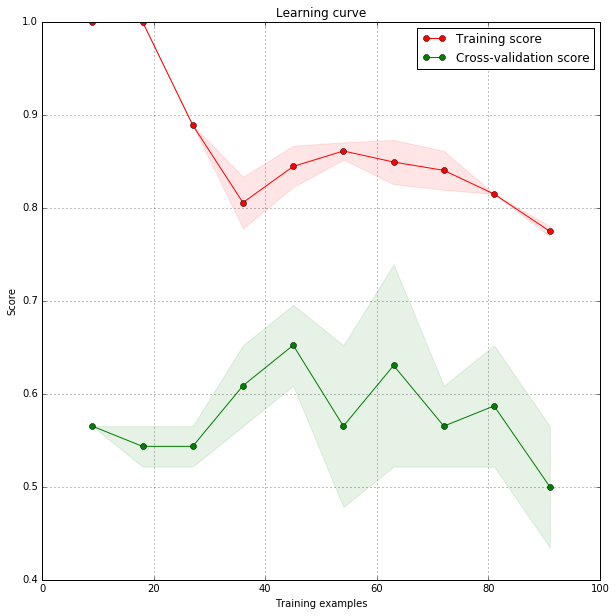

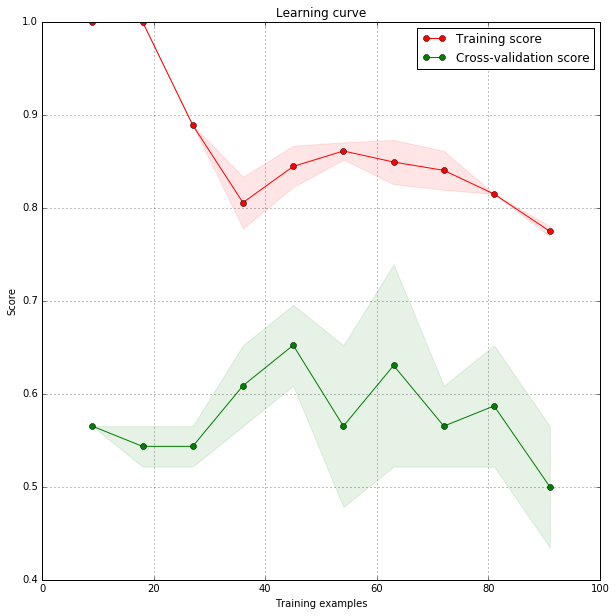

In [28]:
cv = StratifiedShuffleSplit(n_splits=2, test_size=0.2, random_state=42)
learning_curve_model(Xc_train, yc_train, rf_tuned, cv, np.linspace(0.1, 1.0, 10))
plt.show()

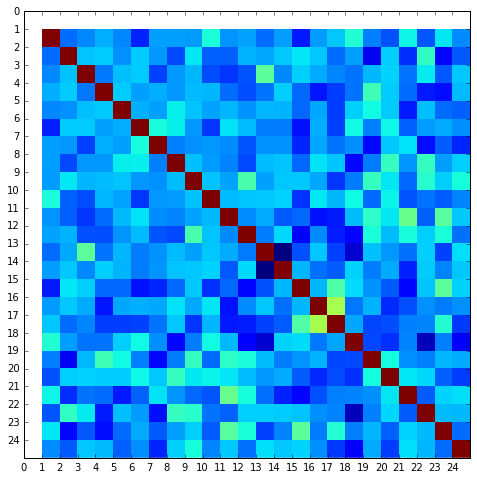

In [25]:
data.corr()
figure = plt.figure(figsize=(8, 8))
ax = figure.add_subplot(111)
ax.set_xticks(range(25))
ax.set_yticks(range(25))
ax.imshow(data.corr(), extent=[0,25,25,0], interpolation='none')
plt.show()

Посмотрим, как ведет себя модель RF при изменении параметров:

In [72]:
print data.corr().ix[17][16]

# plt.scatter(X[idx, 0], X[idx, 1], c=color, label=iris.target_names[i],
#                     cmap=plt.cm.Paired)

0.378641222831


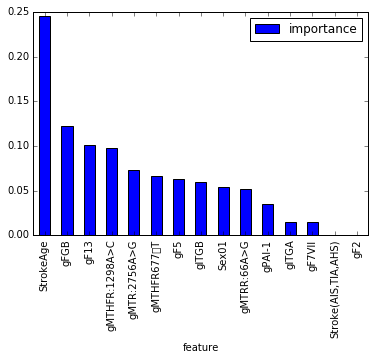

In [346]:
importances = pd.DataFrame({'feature':Xc_train.columns,'importance':dt2.feature_importances_})
importances = importances.sort_values('importance',ascending=False).set_index('feature')
importances.plot.bar()
plt.show()

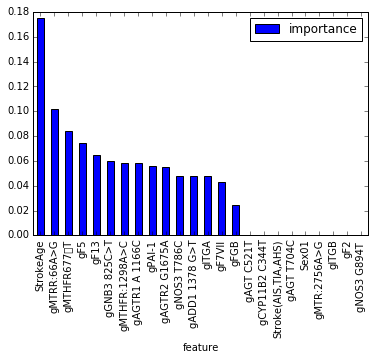

In [347]:
importances = pd.DataFrame({'feature':Xd_train.columns,'importance':dt.feature_importances_})
importances = importances.sort_values('importance',ascending=False).set_index('feature')
importances.plot.bar()
plt.show()
# print importances

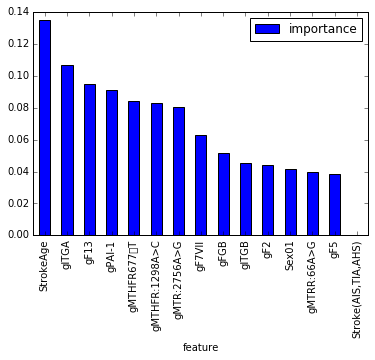

In [145]:
importances = pd.DataFrame({'feature':Xc_train.columns,'importance':rf_tuned.feature_importances_})
importances = importances.sort_values('importance',ascending=False).set_index('feature')
importances.plot.bar()
plt.show()

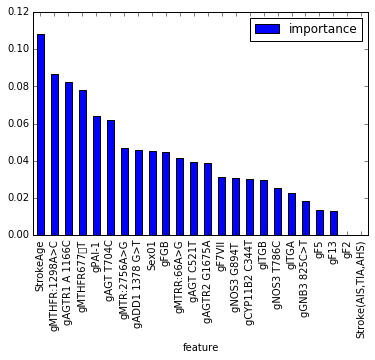

In [345]:
importances = pd.DataFrame({'feature':Xd_train.columns,'importance':rf.feature_importances_})
importances = importances.sort_values('importance',ascending=False).set_index('feature')
importances.plot.bar()
plt.show()

Как видно, важность признаков в случайном лесе в среднем ниже, что обусловлено усреднением их значений при бэггинге.

In [33]:
from sklearn.model_selection import KFold
kf = KFold(n_splits=8, shuffle=True)

#for train_index, test_index in kf.split(X_chopped):
#    print "TRAIN:", train_index, "TEST:", test_index

In [356]:
from sklearn.model_selection import cross_val_score

scores = cross_val_score(dt, X_dropped, Y_dropped, cv=10)
print "mean: {:.3f} (std: {:.3f})".format(scores.mean(),
                                          scores.std())

mean: 0.389 (std: 0.210)


In [ ]:
from sklearn.model_selection import cross_val_score

scores = cross_val_score(rf2, X_chopped, Y_chopped, cv=20)
print "mean: {:.3f} (std: {:.3f})".format(scores.mean(),
                                          scores.std())

In [29]:
from sklearn.neural_network import MLPClassifier

nn = MLPClassifier(solver='adam', alpha=1e-5, 
                    hidden_layer_sizes=(5, 2), random_state=1)
nn.fit(Xc_train, yc_train)

res = nn.predict(Xc_test)
print classification_report(yc_test, res)


             precision    recall  f1-score   support

          0       0.65      0.87      0.74        15
          1       0.78      0.50      0.61        14

avg / total       0.71      0.69      0.68        29



/usr/local/lib/python2.7/dist-packages/sklearn/neural_network/multilayer_perceptron.py:563: ConvergenceWarning: Stochastic Optimizer: Maximum iterations reached and the optimization hasn't converged yet.
  % (), ConvergenceWarning)


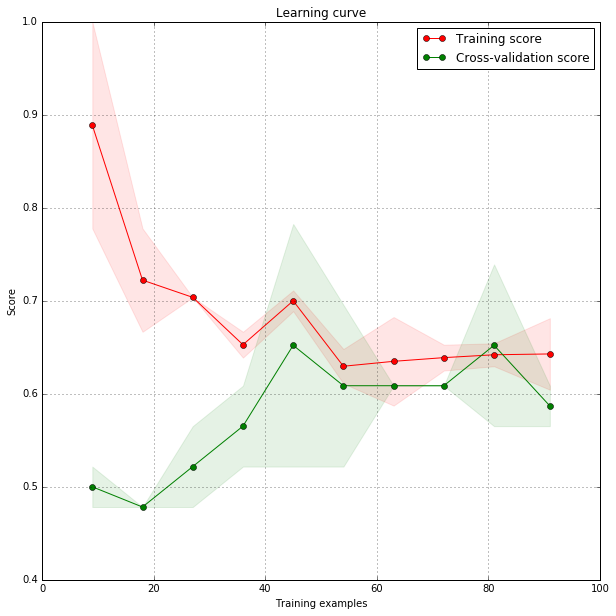

In [32]:
cv = StratifiedShuffleSplit(n_splits=2, test_size=0.2, random_state=42)
learning_curve_model(Xc_train, yc_train, nn, cv, np.linspace(0.1, 1.0, 10))
plt.show()